<a href="https://colab.research.google.com/github/Progra-man/dap-2024/blob/main/les06/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №6. Линейная регрессия
##Задания
###задание 1

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

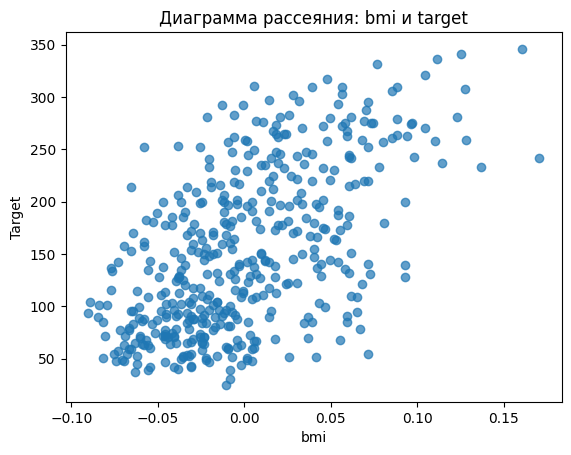

Признаки с наибольшей корреляцией: ['bmi', 's5', 'bp', 's4', 's3']
Root Mean Squared Error (RMSE): 53.78
R² (коэффициент детерминации): 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Извлечение данных
diabetes = datasets.load_diabetes()

# Выводим описание набора данных
print(diabetes.DESCR)

# Выводим наименования признаков
print("Признаки:", diabetes.feature_names)

# 2. Подготовка данных
# Создаём DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Выводим первые 5 строк набора данных
print(df.head())

# Выводим информацию о типах данных
print(df.info())

# Проверяем наличие категориальных признаков и значений null
print("Категориальные признаки:", df.select_dtypes(include=['object']).columns.tolist())
print("Пропущенные значения:", df.isnull().sum().sum())

# 3. Исследование данных
# Построение матрицы корреляции
correlation_matrix = df.corr()
print("Матрица корреляции:")
print(correlation_matrix)

# Построим диаграмму рассеяния для признака с наибольшей корреляцией с целевым значением
most_correlated_feature = correlation_matrix['target'].drop('target').idxmax()
print(f"Признак с наибольшей корреляцией с целевым значением: {most_correlated_feature}")

plt.scatter(df[most_correlated_feature], df['target'], alpha=0.7)
plt.title(f"Диаграмма рассеяния: {most_correlated_feature} и target")
plt.xlabel(most_correlated_feature)
plt.ylabel('Target')
plt.show()

# 4. Формирование наборов данных
# Выбираем 5 признаков с наибольшей корреляцией с целевым значением
top_features = correlation_matrix['target'].drop('target').abs().nlargest(5).index.tolist()
print("Признаки с наибольшей корреляцией:", top_features)

# Формируем X и y
X = df[top_features]
y = df['target']

# 5. Предсказательная модель
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создаём и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Проверка модели
# Предсказания
y_pred = model.predict(X_test)

# Расчёт RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Расчёт R²
r2 = r2_score(y_test, y_pred)
print(f"R² (коэффициент детерминации): {r2:.2f}")
